In [1]:
display(HTML("<style>.rendered_html.text_cell_render {max-width:700px; }</style>"));
push!(LOAD_PATH, "src");

HTML{String}("<style>.rendered_html.text_cell_render {max-width:700px; }</style>")

# SLAM Benchmarking datasets

Lidarscancs from different environments, including MIT CSAIL and MIT Killian Court.
- http://ais.informatik.uni-freiburg.de/slamevaluation/datasets.php

I processed the data in the other data python notebook and stored it as a json file.
The json should have the following keys

- `z`: **Depths**** measurements -- shape (T,N)
- `a`: **Angles** (directions) of range measurments -- shape (N,)
- `x`: **2D Positions** -- shape (T,2) or if just the intial pose is given (1,2) or (2,)
- `hd`: **Head-directions** -- shape (T,) or if just the intial pose is given (1,1) or (1,)
- `dx`: **Position-control** -- shape (T-1,2)
- `dhd`: **Head-control** shape (T-1,)



In [3]:
#nbx --fname=src/slam_data.jl
mutable struct SensorData
    z::Vector{Vector{Float64}}  # Measurements
    a::Vector{Float64}          # ...
    x0::Vector{Float64}         # Initial Pose
    hd0::Float64                # ...
    dx::Vector{Vector{Float64}} # Controls 
    dhd::Vector{Float64}        # ....

end

Base.length(d::SensorData) = Base.length(d.z)

In [4]:
#nbx 
import JSON
const slam_data_keys = ["z", "a", "x", "hd", "dx", "dhd"] 

"""
    d::Dict = load_sensor_data(fname)

Loads sensor data json. Assumes/requires that the json 
contains keys: `z`, `a`, `x`, `hd`, `dx`, and `dhd`.
"""
function load_sensor_data(fname)
    d′  = JSON.parsefile(fname)
    d = Dict()
    for k in slam_data_keys
        d[k] = [Float64.(x) for x in d′[k]]
    end
    return SensorData(d["z"], d["a"], d["x"][1], d["hd"][1],  d["dx"], d["dhd"])
end

load_sensor_data

In [5]:
#nbx
# Todo: the path shouldn't be hard coded!!
load_csail_data() = load_sensor_data("data/mit-csail.json")

load_csail_data (generic function with 1 method)

In [6]:
#nbx 
using Colors, Plots
col = palette(:default);

function Plots.plot!(t::Int, d::SensorData; args...)
    z = d.z[t]
    a = d.a 
    scatter!(z.*cos.(a), z.*sin.(a); args...)
end

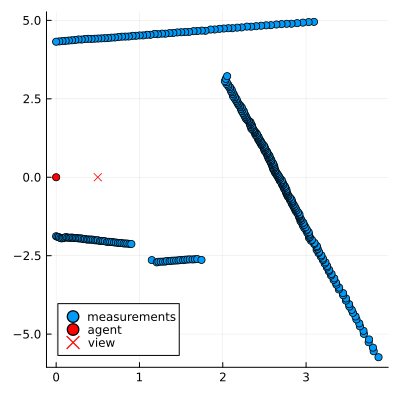

In [12]:
d = load_csail_data()
# ----------------
plot(size=(400,400), aspect_ration=:equal)
plot!(rand(1:length(d)), d, label="measurements")
scatter!([0],[0], c=:red, label="agent")
scatter!([0.5],[0], marker=:x, c=:red, label="view")